# End-to-End Automatic License Plate Detection and Recognition

In [1]:
# import necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt
import os
from os import listdir
from os.path import isfile, join
from utilities.end_to_end_utilities import *

Using TensorFlow backend.


## Load the weights from YOLO region detection model

In [2]:
# Get yolo model
yolo_model = get_yolo_model()

try:
    yolo_model.load_weights("./weights/all_cars_weights_10222018.h5")
    print("YOLO weights successfully loaded.")
except:
    raise Exception("No weight file found!")

Instructions for updating:
Colocations handled automatically by placer.
YOLO model successfully configured.
YOLO weights successfully loaded.


## and load the OCR model using the model specs and the weights

In [3]:
# Get CRNN model
keras_ocr_model = get_model_grul4(training=False)

# and load the weights
try:
    keras_ocr_model.load_weights('./weights/GRU20--30--2.958.hdf5')
    print("OCR weights loaded successfully.")
except:
    raise Exception("No weight file found!")

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
OCR model successfully configured.
OCR weights loaded successfully.


### Read in the validation images for testing

In [26]:
img_folder = "./images/"

all_images = [f for f in listdir(img_folder) if isfile(join(img_folder, f))]
print(len(all_images)) # currently have 145 images in our validation set

100


### Display the full image

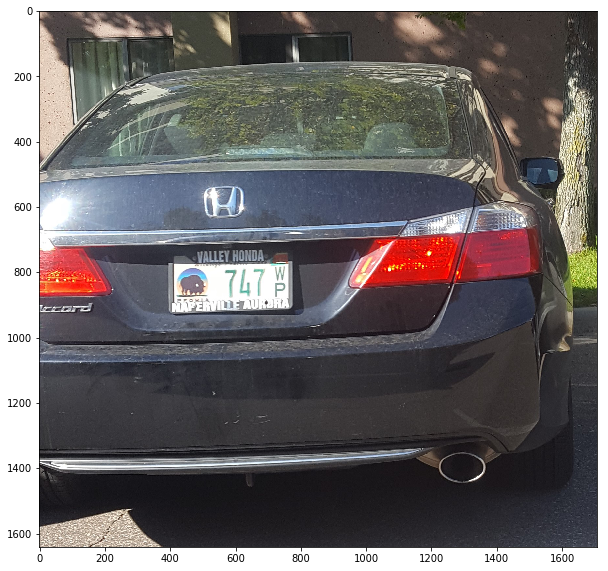

In [32]:
img_index = 25 # 0 through 99

import matplotlib.image as mpimg
img = mpimg.imread(f"{img_folder}{all_images[img_index]}")
plt.figure(figsize=(10, 10))
plt.imshow(img)

### Display the cropped LP + predicted value

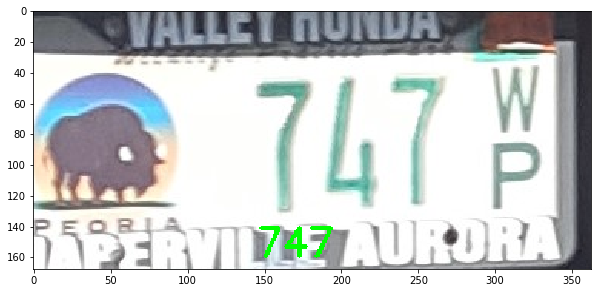

In [33]:
get_lp(input_image_filename=all_images[img_index], 
       input_image_folder=img_folder,
       yolo_model=yolo_model,
       keras_ocr_model=keras_ocr_model)